In [160]:
!pip install scikit-learn
!pip install category_encoders

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


pre-processing of fact table data

In [162]:
# data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/dataset_file.csv")
# data.head(10)

# data['fweatherdate'] = pd.to_datetime(data['fweatherdate'])
# data['fcasedate'] = pd.to_datetime(data['fcasedate'])
# data['fvaccinationdate'] = pd.to_datetime(data['fvaccinationdate'])

# data.head(10)

In [163]:
# grouped = data.groupby(["fweatherid","fweatherdate"])[["temperature","proportionfullyvaccinated", "ratechangecases"]].mean()
# grouped.head(20)
# grouped.to_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/data/grouped.csv")

In [164]:
# Read grouped data
data = pd.read_csv("/Users/bhavikasewpal/Desktop/CSI4142-Phase-4/Part-A/data/grouped.csv")
data['date'] = pd.to_datetime(data['date'])
# Encode nominal variable date (contains 26 distinct values)
data['date'] = data['date'].apply(lambda x: x.toordinal())

In [165]:
encoder = ce.OneHotEncoder(cols=['weatherid']) 
data = encoder.fit_transform(data)
data.head(2)

,weatherid_1,weatherid_2,weatherid_3,weatherid_4,weatherid_5,weatherid_6,weatherid_7,weatherid_8,weatherid_9,weatherid_10,...,weatherid_60,weatherid_61,weatherid_62,weatherid_63,weatherid_64,weatherid_65,date,temperature,proportionfullyvaccinated,ratechangecases
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737760,5.6,0.00,817.275
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,737791,5.3,0.06,1136.350


In [166]:
predictors = data.loc[:, data.columns.drop('ratechangecases')]
predictors.head(20)
X = predictors.values
Y = data['ratechangecases'].values

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10,random_state=44)

In [168]:
def score(algorithm, training_data, training_target, testing_data, testing_target, random_state=44):
    predictions = []
    tree_depth = []
    rmse = []
    mse = []
    mae = []
    r2 = []

    for depth in range(10,50,10):
        if algorithm == "decision-tree":
            regressor = DecisionTreeRegressor(random_state=random_state, max_depth=depth)
        elif algorithm == "gradient-boosting":
            regressor = GradientBoostingRegressor(random_state=random_state, max_depth=depth)
        elif algorithm == "random-forest":
            regressor = RandomForestRegressor(random_state=random_state, max_depth=depth)
        else:
            print("invalid algorithm name")
        regressor.fit(training_data,training_target)
        prediction = regressor.predict(testing_data)
        rmse_value = (mean_squared_error(testing_target,prediction)**0.5)
        mse_value = mean_squared_error(testing_target, prediction)
        mae_value = mean_absolute_error(testing_target, prediction)
        r2_value = r2_score(testing_target,prediction)
        tree_depth.append(depth)
        rmse.append(rmse_value)
        mse.append(mse_value)
        mae.append(mae_value)
        r2.append(r2_value)
        predictions.append(prediction)
    return predictions,tree_depth, rmse, mse, mae, r2
        

In [169]:
def plot_graph(true_value, prediction):
    plt.figure(figsize=(10,10))
    plt.scatter(true_value, prediction, c='crimson')
    plt.xlabel('True-Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

In [170]:
def run():
    a = 3
    b = "name"
    c = 66
    return a,b,c

In [171]:
q,w,r = run()
w

'name'

Decision Tree algorithm

In [172]:
predictions, tree_depth, rmse, mse, mae, r2 = score("decision-tree", X_train, y_train, X_test, y_test)

In [173]:
print(tree_depth)
print(rmse)
print(mse)
print(mae)
print(r2)

[10, 20, 30, 40]
[1111.8754042378855, 910.5426146838493, 726.2337461001978, 681.7781554087984]
[1236266.9145491614, 829087.8531553008, 527415.4539747266, 464821.4531926237]
[649.2535223012276, 381.6451068100486, 259.581927941108, 211.9555165908057]
[0.9699135769617819, 0.9798228945607793, 0.9871645481421266, 0.9886878677141558]


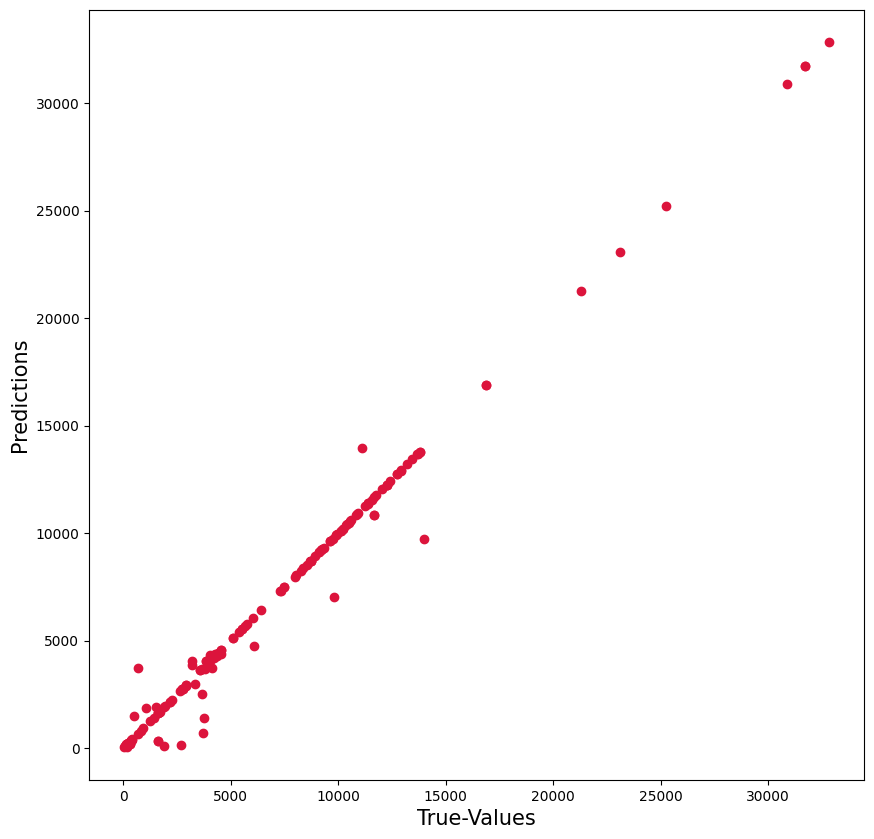

In [174]:
plot_graph(y_test, predictions[3])

Gradient Boosting algorithm

In [175]:
predictions, tree_depth, rmse, mse, mae, r2 = score("gradient-boosting", X_train, y_train, X_test, y_test)

In [176]:
print(tree_depth)
print(rmse)
print(mse)
print(mae)
print(r2)

[10, 20, 30, 40]
[517.0735545475418, 641.5801934287581, 755.654902801282, 672.0788706384833]
[267365.06081242964, 411625.1446000827, 571014.3321276149, 451690.00835869915]
[252.34661483114428, 219.40524782438513, 238.89811277684845, 217.7785929695603]
[0.9934932673271653, 0.9899824802493221, 0.9861035035758907, 0.989007441262333]


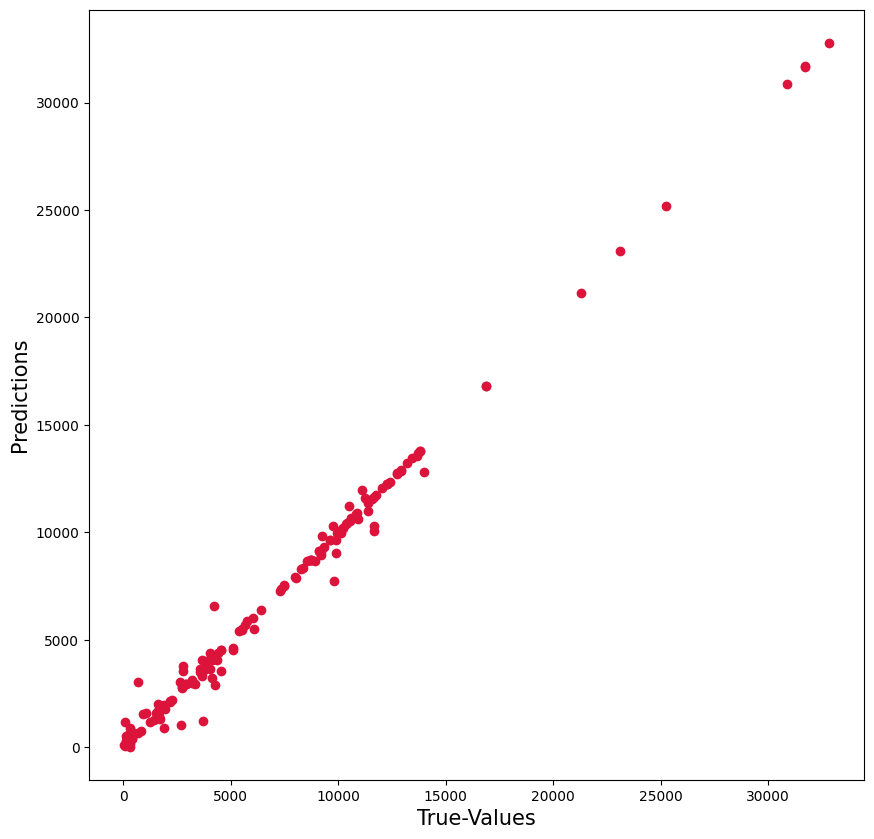

In [177]:
plot_graph(y_test, predictions[0])

Random Forest Algorithm

In [178]:
predictions, tree_depth, rmse, mse, mae, r2 = score("random-forest", X_train, y_train, X_test, y_test)

In [179]:
print(tree_depth)
print(rmse)
print(mse)
print(mae)
print(r2)

[10, 20, 30, 40]
[1242.8611471166116, 749.6961968102252, 699.3901267811808, 690.160095759532]
[1544703.8310120197, 562044.3875117159, 489146.54943899624, 476320.95777880645]
[955.4717738224216, 509.67981129891723, 440.2488638267238, 429.0174970164085]
[0.9624072986329719, 0.986321800729335, 0.988095879748207, 0.988408009897338]


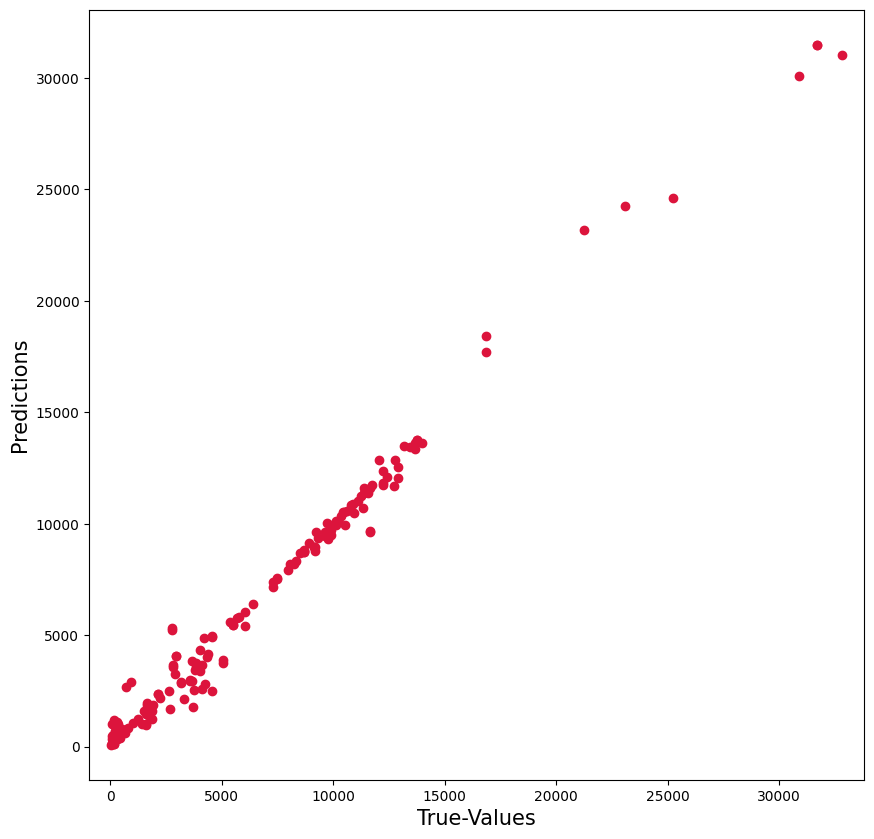

In [180]:
plot_graph(y_test, predictions[3])